In [0]:
import numpy as np
import pandas as pd
from google.colab import drive
import cv2 as cv
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.regularizers import l2
from keras.layers import GaussianNoise
from keras.utils import to_categorical

drive.mount('/content/drive')

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/Ass4/ass4/mais202-fall2019"

label_int_to_str_mapping.csv  submission.csv   train_images.npy
sample_submission.csv	      test_images.npy  train_labels.csv


##Importing the data and normalizing each picture.
Since we used RELU, we thought substracting each pixel by 0.5 would put the non-important pixels (that are negative) to 0 in the first convolutional layer.
Thus, the positive pixels would have greater significance.

The code commented out was an attempt to increase our sample size by rotating pictures. This did not work and lowered our testing accuracy to 84%, thus we discarded that idea.

IF DOWNLOADING THE REPO, REMOVE "/content/drive/My Drive/Ass4/ass4/mais202-fall2019/" for data import.


In [0]:
train_images = np.load("/content/drive/My Drive/Ass4/ass4/mais202-fall2019/train_images.npy")
train_images = (train_images / 255) - 0.5

train_labels = pd.read_csv("/content/drive/My Drive/Ass4/ass4/mais202-fall2019/train_labels.csv")
test_images = np.load("/content/drive/My Drive/Ass4/ass4/mais202-fall2019/test_images.npy")
test_images = np.expand_dims(test_images, axis=3)
test_images = (test_images / 255) - 0.5

categories = pd.read_csv("/content/drive/My Drive/Ass4/ass4/mais202-fall2019/label_int_to_str_mapping.csv")
y_train = to_categorical(train_labels['label'])

# new_data = []
#Rotating each picture in order to get a higher sample size.
# for i,v in enumerate(train_images):
#     new_data.append(np.rot90(v))
# train_images = np.concatenate((train_images, np.array(new_data)))
train_images = np.expand_dims(train_images, axis=3)


# train_labels = train_labels.append(train_labels)



As you can see, the shirt is more lit up compared to when we had not substracted each pixel by 0.5. Try it out by removing the -0.5!

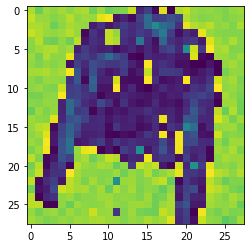

In [0]:
import matplotlib.pyplot as plt

def show_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    plt.show()

show_image((train_images[1])) # 0 is the index of the training image you want to display


## Model 1
Attempt with the highest testing accuracy after 10-12 epochs.
Increasing the numbers pass 12 epochs did not result in better testing results.


In [0]:
input_shape = (28, 28, 1)
num_classes = (10)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
# model.add(GaussianNoise(0.01))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model.add(Conv2D(64, (3, 3),activation='relu', padding='same',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(100, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1000, kernel_regularizer=l2(0.002), activation='relu'))
model.add(Dense(1000, kernel_regularizer=l2(0.002), activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 27, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 100)       57700     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 100)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2500)             

In [0]:
model.fit(
  train_images,
  y_train,
  epochs=10,
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





50000/50000 [==============================] - 35s 700us/step - loss: 0.8395 - acc: 0.7750
Epoch 2/10
50000/50000 [==============================] - 28s 558us/step - loss: 0.5273 - acc: 0.8410
Epoch 3/10
50000/50000 [==============================] - 28s 558us/step - loss: 0.4662 - acc: 0.8560
Epoch 4/10
50000/50000 [==============================] - 28s 559us/step - loss: 0.4345 - acc: 0.8676
Epoch 5/10
50000/50000 [==============================] - 28s 559us/step - loss: 0.4112 - acc: 0.8734
Epoch 6/10
50000/50000 [==============================] - 28s 554us/step - loss: 0.3954 - acc: 0.8792
Epoch 7/10
50000/50000 [==============================] - 28s 556us/step - loss: 0.3762 - acc: 0.8843
Epoch 8/10
50000/50000 [==============================] - 28s 554us/step - loss: 0.3663 - acc: 0.8879
Epoch 9/10
50000/50000 [==============================] - 28s 558us/step - loss: 0

## Model 2
Tried using a more parsimonious model by reducing the complexity of the model.
We commented out a layer and reduce the number of neurons for the fully connected layer. This did yield good training results but did not significantly improve out testing accuracy.
We additionally decreased our regularization to see if we could yield better testing results.

In [0]:
input_shape = (28, 28, 1)
num_classes = (10)
model2 = Sequential()
model2.add(Conv2D(64, kernel_size=(3, 3), padding='same', strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
# model.add(GaussianNoise(0.01))
model2.add(MaxPooling2D(pool_size=(3, 3)))
model2.add(Conv2D(128, (3, 3),activation='relu', padding='same',))
model2.add(MaxPooling2D(pool_size=(2, 2)))
# model2.add(Conv2D(256, (2, 2), activation='relu', padding='same'))
# model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(256, kernel_regularizer=l2(0.001), activation='relu'))
model2.add(Dense(256,kernel_regularizer=l2(0.001), activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               524544    
_________________________________________________________________
dense_11 (Dense)             (None, 256)              

In [0]:
model2.fit(
  train_images,
  y_train,
  epochs=10,
  shuffle=True,
)

Epoch 1/10
50000/50000 [==============================] - 18s 366us/step - loss: 0.7748 - acc: 0.7682
Epoch 2/10
50000/50000 [==============================] - 17s 347us/step - loss: 0.5413 - acc: 0.8345
Epoch 3/10
50000/50000 [==============================] - 17s 349us/step - loss: 0.4815 - acc: 0.8507
Epoch 4/10
50000/50000 [==============================] - 18s 363us/step - loss: 0.4448 - acc: 0.8616
Epoch 5/10
50000/50000 [==============================] - 18s 366us/step - loss: 0.4183 - acc: 0.8682
Epoch 6/10
50000/50000 [==============================] - 18s 366us/step - loss: 0.3983 - acc: 0.8757
Epoch 7/10
50000/50000 [==============================] - 18s 366us/step - loss: 0.3815 - acc: 0.8820
Epoch 8/10
50000/50000 [==============================] - 18s 367us/step - loss: 0.3635 - acc: 0.8881
Epoch 9/10
50000/50000 [==============================] - 18s 365us/step - loss: 0.3515 - acc: 0.8951
Epoch 10/10
50000/50000 [==============================] - 18s 366us/step - loss: 

## Model 3
Tweaking of the second attempt. We played with the number of filters and the number of neurons to see if we could get better results.


In [0]:
input_shape = (28, 28, 1)
num_classes = (10)
model3 = Sequential()
model3.add(Conv2D(64, kernel_size=(3, 3), padding='same', strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
# model3.add(GaussianNoise(0.01))
model3.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model3.add(Conv2D(128, (3, 3),activation='relu'))
model3.add(MaxPooling2D(pool_size=(3, 3)))


model3.add(Flatten())
model3.add(Dense(500, kernel_regularizer=l2(0.001), activation='relu'))
model3.add(Dense(500,kernel_regularizer=l2(0.001), activation='relu'))
model3.add(Dense(num_classes, activation='softmax'))

model3.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 500)               576500    
_________________________________________________________________
dense_14 (Dense)             (None, 500)              

In [0]:
model3.fit(
  train_images,
  y_train,
  epochs=10,
  shuffle=True
)

Epoch 1/10
50000/50000 [==============================] - 22s 440us/step - loss: 0.8403 - acc: 0.7566
Epoch 2/10
50000/50000 [==============================] - 21s 429us/step - loss: 0.5781 - acc: 0.8154
Epoch 3/10
50000/50000 [==============================] - 21s 428us/step - loss: 0.5132 - acc: 0.8354
Epoch 4/10
50000/50000 [==============================] - 22s 430us/step - loss: 0.4686 - acc: 0.8499
Epoch 5/10
50000/50000 [==============================] - 21s 428us/step - loss: 0.4446 - acc: 0.8579
Epoch 6/10
50000/50000 [==============================] - 22s 431us/step - loss: 0.4202 - acc: 0.8649
Epoch 7/10
50000/50000 [==============================] - 22s 432us/step - loss: 0.4018 - acc: 0.8726
Epoch 8/10
50000/50000 [==============================] - 21s 427us/step - loss: 0.3911 - acc: 0.8747
Epoch 9/10
50000/50000 [==============================] - 21s 427us/step - loss: 0.3769 - acc: 0.8805
Epoch 10/10
50000/50000 [==============================] - 21s 427us/step - loss: 

##Getting the predictions
Getting the testing predictions and outputting the csv file into my google drive.
To output between the three attempts, write: submission_export(model)
model can be model, model2, model3

In [0]:
def submission_export(model):
  predictions = model.predict(test_images)
  df_test = pd.read_csv('/content/drive/My Drive/Ass4/ass4/mais202-fall2019/sample_submission.csv')
  df_test['label'] = np.argmax(predictions, axis=1)
  df_test.to_csv('/content/drive/My Drive/Ass4/ass4/mais202-fall2019/submission.csv', index=False)

In [0]:
#Use this line to export the data

#submission_export(model)